<a href="https://colab.research.google.com/github/itsMeJunaid/Heart-Attack-Prediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading the Data

In [302]:
import pandas as pd

In [303]:
df=pd.read_csv('heart.csv')

In [304]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [305]:
df.shape

(1025, 14)

#2. Data Cleaning

In [306]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [307]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [308]:
# Drop duplicates if any
df = df.drop_duplicates()



# 3. Exploratory Data Analysis (EDA)

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

#sumary Statistic
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


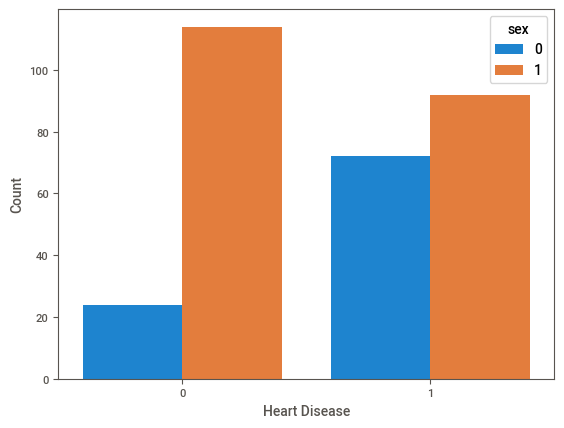

In [310]:
# Visualize the distribution of the target variable (heart disease)
sns.countplot(x='target', hue='sex', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

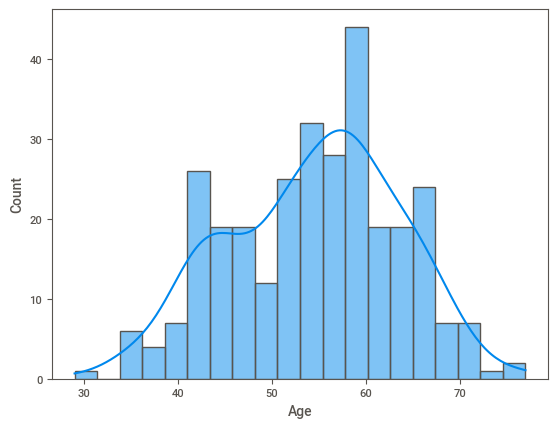

In [311]:
# Visualizing age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [232]:
!pip install ydata-profiling


##  Profile Report

In [169]:
import pandas_profiling as pp

# Generate Sweetviz report
pp.ProfileReport(df)



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

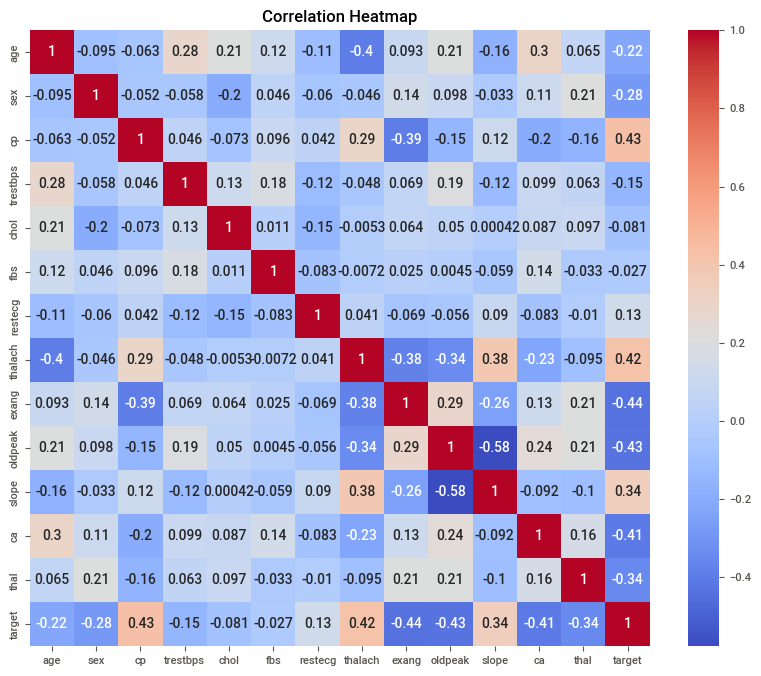

In [312]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Data Preprocessing

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [314]:
# Define features and target variable
X = df.drop(['target'], axis=1)
y = df['target']


In [315]:


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [316]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [317]:
X_test.shape

(61, 13)

In [318]:
X_train.shape

(241, 13)

# 5. Feature Engineering

In [319]:
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [320]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,70+
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69


# 6. Model Training and Testing

## Logistic Regression

Confusion Matrix:
[[20  5]
 [ 5 31]]


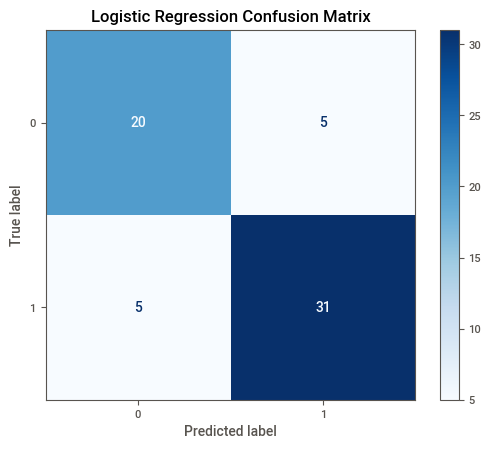


Accuracy of Logistic Regression: 83.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.86      0.86      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# Accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Confusion Matrix
cm = confusion_matrix(y_test, lr_predictions)

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix as a Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Print Accuracy
print(f"\nAccuracy of Logistic Regression: {lr_accuracy * 100:.2f}%\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, lr_predictions))


## Random Forest Classifier

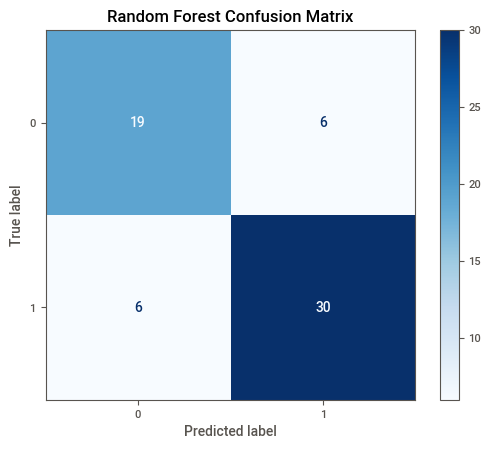

Accuracy of Random Forest: 80.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.83      0.83      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [322]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Confusion Matrix
cm = confusion_matrix(y_test, rf_predictions)

# Display Confusion Matrix as a Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Print Accuracy
print(f"Accuracy of Random Forest: {rf_accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


## Support Vector Machine (SVM)

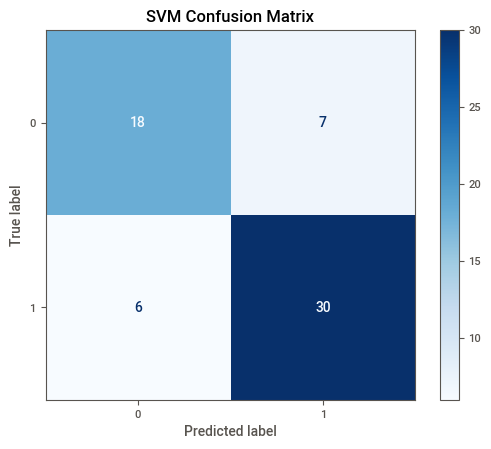

Accuracy of SVM: 78.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [323]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Confusion Matrix
cm = confusion_matrix(y_test, svm_predictions)

# Display Confusion Matrix as a Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

# Print Accuracy
print(f"Accuracy of SVM: {svm_accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, svm_predictions))


## K-Nearest Neighbors (KNN)

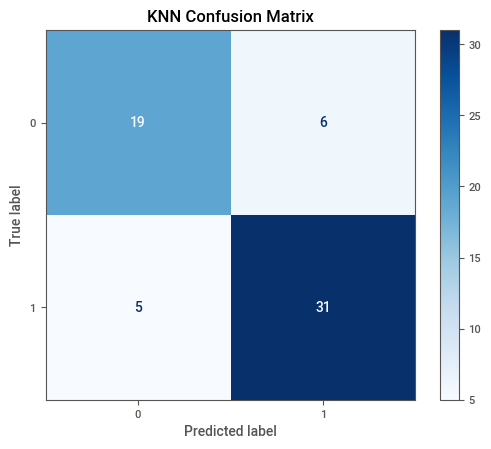

Accuracy of KNN: 81.97%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [324]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_predictions = knn_model.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions)

# Display Confusion Matrix as a Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

# Print Accuracy
print(f"Accuracy of KNN: {knn_accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, knn_predictions))


## XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


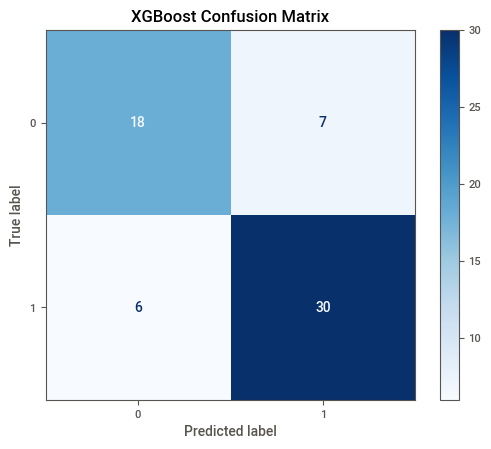

Accuracy of XGBoost: 78.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [325]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_predictions)

# Display Confusion Matrix as a Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Print Accuracy
print(f"Accuracy of XGBoost: {xgb_accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))


# 7. Model Comparison and Performance Curves

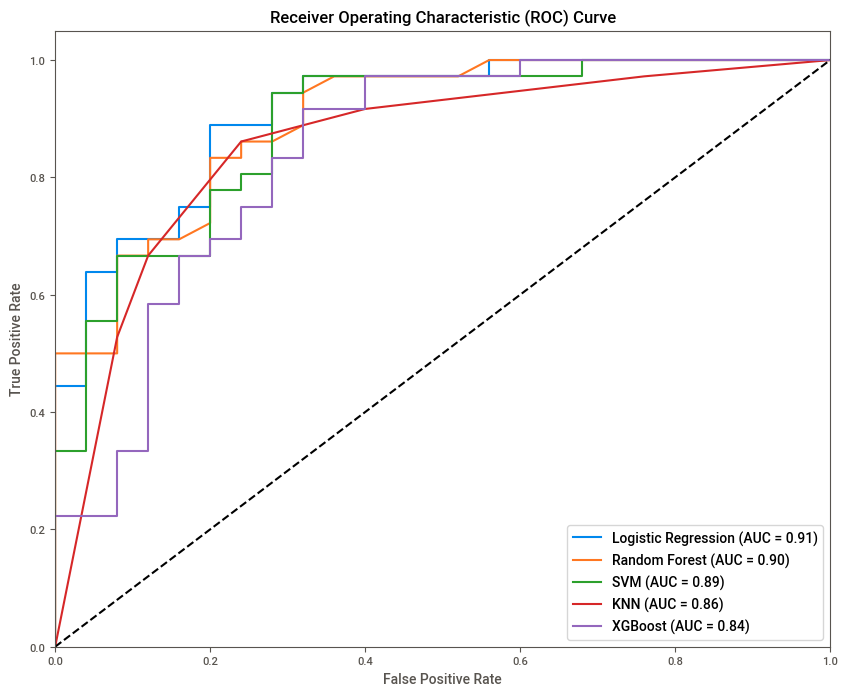

In [328]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc(fpr_lr, tpr_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc(fpr_svm, tpr_svm))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc(fpr_knn, tpr_knn))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc(fpr_xgb, tpr_xgb))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# 8. Final Model Selection

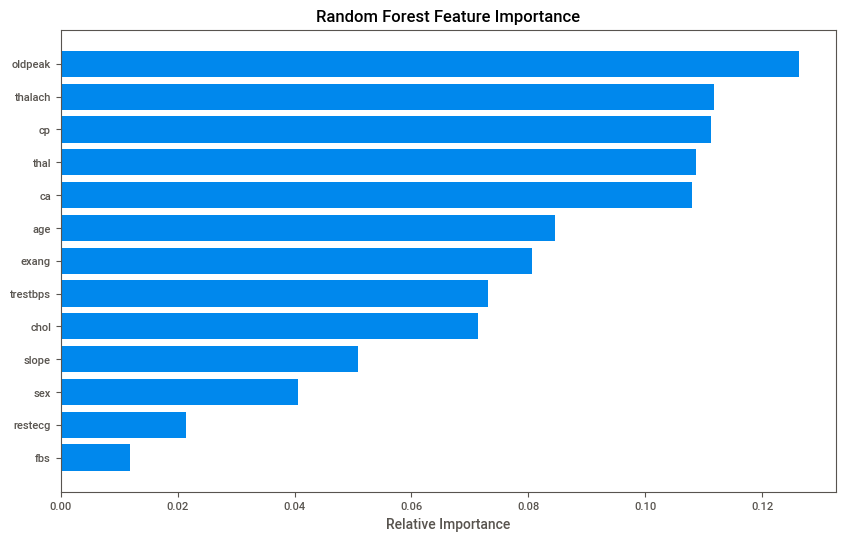

In [329]:
# Feature importance for Random Forest or XGBoost (Example)
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


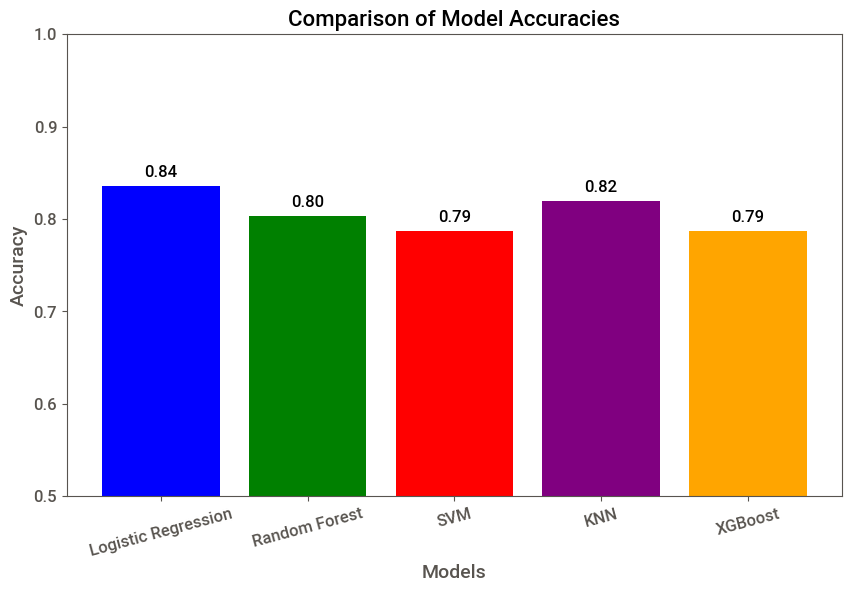

In [330]:
# Store the accuracies in a dictionary
model_accuracies = {
    "Logistic Regression": lr_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "KNN": knn_accuracy,
    "XGBoost": xgb_accuracy
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Add titles and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0.5, 1)  # Set y-axis range for better visualization
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for i, value in enumerate(model_accuracies.values()):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

# Display the plot
plt.show()

# Testing Model Prediction

In [334]:
def predict_heart_disease(model, scaler):
    print("\nEnter the following details:")
    try:
        # Collect user input
        age = int(input("Age: "))
        sex = int(input("Sex (1 = Male, 0 = Female): "))
        cp = int(input("Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic): "))
        trestbps = float(input("Resting Blood Pressure (mm Hg): "))
        chol = float(input("Serum Cholesterol (mg/dl): "))
        fbs = int(input("Fasting Blood Sugar (> 120 mg/dl, 1 = True, 0 = False): "))
        restecg = int(input("Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy): "))
        thalach = float(input("Maximum Heart Rate Achieved: "))
        exang = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
        oldpeak = float(input("ST Depression Induced by Exercise Relative to Rest: "))
        slope = int(input("Slope of the Peak Exercise ST Segment (0 = Upsloping, 1 = Flat, 2 = Downsloping): "))
        ca = int(input("Number of Major Vessels (0-3) Colored by Fluoroscopy: "))
        thal = int(input("Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): "))

        # Create input array
        user_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]

        # Scale the input
        user_data_scaled = scaler.transform(user_data)

        # Predict using the trained model
        prediction = model.predict(user_data_scaled)
        prediction_proba = model.predict_proba(user_data_scaled)[:, 1]

        # Interpret the result
        if prediction[0] == 1:
            print("\nPrediction: The model predicts that the person is likely to have heart disease.")
        else:
            print("\nPrediction: The model predicts that the person is unlikely to have heart disease.")

        print(f"Confidence: {prediction_proba[0]:.2f}")
    except ValueError:
        print("Invalid input. Please enter numerical values where required.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage with Logistic Regression (replace with your preferred model)
predict_heart_disease(lr_model, scaler)



Enter the following details:
Age: 63
Sex (1 = Male, 0 = Female): 1
Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic): 3
Resting Blood Pressure (mm Hg): 145
Serum Cholesterol (mg/dl): 233
Fasting Blood Sugar (> 120 mg/dl, 1 = True, 0 = False): 1
Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy): 0
Maximum Heart Rate Achieved: 150
Exercise Induced Angina (1 = Yes, 0 = No): 0
ST Depression Induced by Exercise Relative to Rest: 2.3
Slope of the Peak Exercise ST Segment (0 = Upsloping, 1 = Flat, 2 = Downsloping): 0
Number of Major Vessels (0-3) Colored by Fluoroscopy: 0
Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): 1

Prediction: The model predicts that the person is likely to have heart disease.
Confidence: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
